## Ejercicio 5

A partir de los ejemplos del archivo **automobile-simple.csv**, utilizado en la práctica anterior, se entrenará un combinador lineal para predecir el precio del auto (atributo *price*) en función del tamaño del motor (atributo *engine-size*):

### a) 

Antes de comenzar con el entrenamiento, complete los datos faltantes del atributo *price* utilizando el valor promedio.



In [3]:
import pandas as pd
import numpy as np

DATOS_DIR   = '../../Datos/'
data = pd.read_csv(DATOS_DIR + 'automobile-simple.csv')

price_mean = data["price"].mean()
data["price"] = data["price"].replace(np.nan, price_mean).astype(float)

### b) 

Luego de completar según lo indicado en a), realice el entrenamiento del combinador lineal:

In [8]:
from Fuentes.ClassNeuronaLineal import *

T_raw = np.array(data["price"]).reshape(-1,1)
X_raw = np.array(data["engine-size"]).reshape(-1,1)

ALPHA = 0.01
MAX_ITE = 10000
COTA = 10e-6

**i.** Sin normalizar los atributos.  

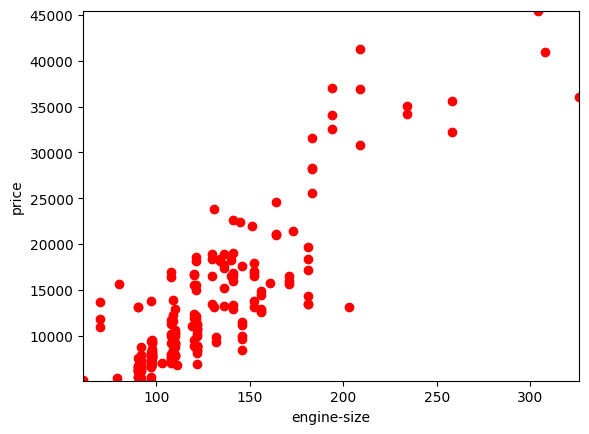

Error cuadrático medio (sin normalizar):  nan


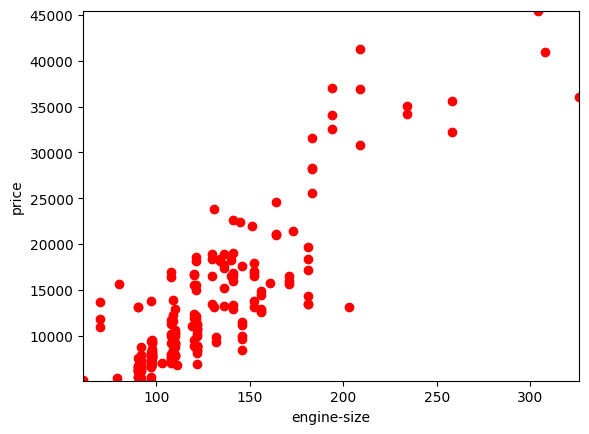

In [9]:
nl_raw = NeuronaLineal(alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA, draw=1, title=['engine-size', 'price'])
nl_raw.fit(X_raw, T_raw)

Y_raw_pred = nl_raw.predict(X_raw)
print("Error cuadrático medio (sin normalizar): ", np.mean((T_raw - Y_raw_pred)**2))

**ii.** Normalizando ambos atributos linealmente.  

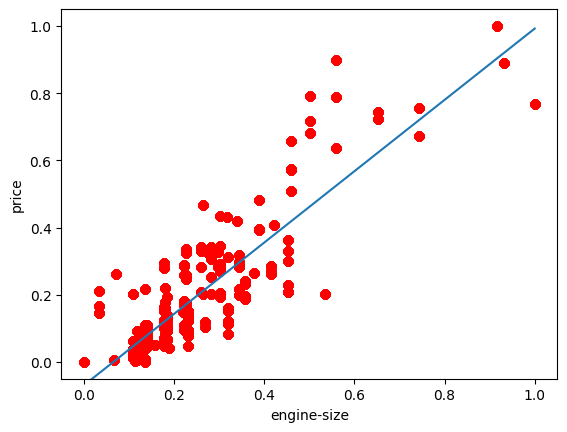

Error cuadrático medio (normalización normal):  0.06571768176613975


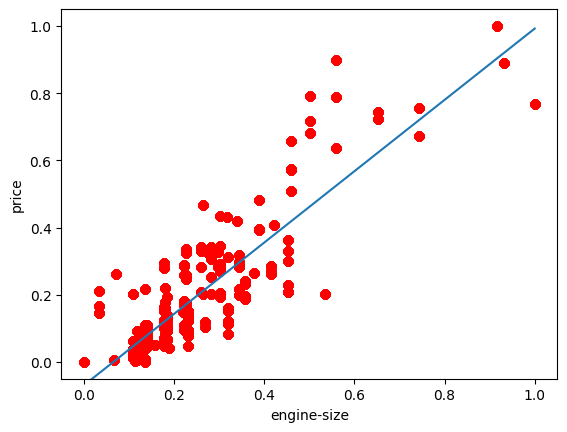

In [10]:
from sklearn.preprocessing import MinMaxScaler
nl_lin = NeuronaLineal(alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA, draw=1, title=['engine-size', 'price'])

data_scaler , targer_scaler= MinMaxScaler(), MinMaxScaler()
X_lin = data_scaler.fit_transform(X_raw)
T_lin = targer_scaler.fit_transform(T_raw)
nl_lin.fit(X_lin, T_lin)

Y_lin_pred = nl_lin.predict(X_lin)
print("Error cuadrático medio (normalización normal): ", np.mean((T_lin - Y_lin_pred)**2))

**iii.** Normalizando ambos atributos utilizando media y desvío.  


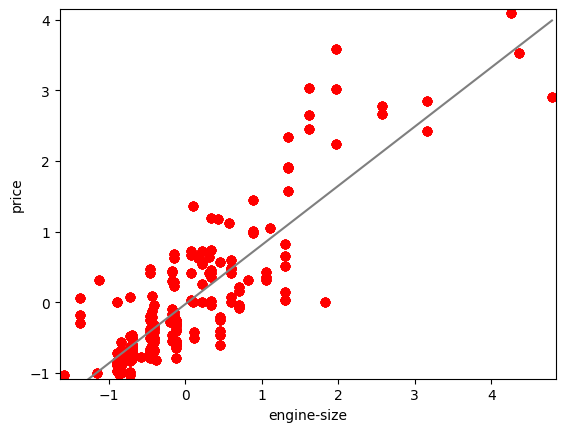

Error cuadrático medio (normalización z-score):  1.7035389225069215


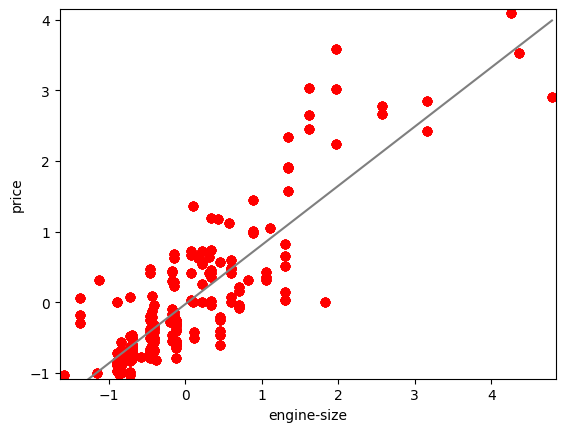

In [11]:
from sklearn.preprocessing import StandardScaler
nl_z = NeuronaLineal(alpha=ALPHA, n_iter=MAX_ITE, cotaE=COTA, draw=1, title=['engine-size', 'price'])

data_scaler , targer_scaler= StandardScaler(), StandardScaler()
X_z = data_scaler.fit_transform(X_raw)
T_z = targer_scaler.fit_transform(T_raw)
nl_z.fit(X_z, T_z)

Y_z_pred = nl_z.predict(X_z)
print("Error cuadrático medio (normalización z-score): ", np.mean((T_z - Y_z_pred)**2))

Analice el impacto de la normalización en el entrenamiento. ¿Qué resultados obtuvo sin normalizar los atributos? ¿Alguna de las normalizaciones es mejor? Explique.

> **Conclusión:** Sin normalizar los datos se obtuvieron errores producto de los altos valores de entrada, lo cuál produjo un overflow. La mejor normalización es la lineal, definido por el error cuadrático medio. La normalización lineal (min-max) suele dar mejores resultados que no normalizar o usar z-score, especialmente si los datos tienen rangos muy distintos porque esto hace que el ajuste que se hace sea mayor.